In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import folium
import math
import time
import geopandas as gpd
from shapely.geometry import Point


In [2]:
# Read the Excel file
df = pd.read_excel('cleaned_xlsx_data/final-data.xlsx')

In [5]:
# head of data
df.head(10)

,household_id,village_id,village_name,sublocation_name,sublocation_id,location_id,location_name,constituency_name,county_name,isbeneficiaryhh,latitude,longitude,ruralurban,constituency_id,entry_date,usercode,county_id
0,510070801017752520158,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.93014,41.82208,urban,43,2017-09-07 18:55:00,158,9
1,510070801017752540161,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.93231,41.81828,urban,43,2017-12-01 17:47:00,161,9
2,510070801017752530161,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.93234,41.81821,urban,43,2017-12-01 17:47:00,161,9
3,510070801017752530158,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.92908,41.82085,urban,43,2017-09-14 20:19:00,158,9
4,510070801017752550158,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,True,3.92885,41.82087,urban,43,2017-09-14 20:19:00,158,9
5,510070801017752520161,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.93238,41.81829,urban,43,2017-12-01 17:47:00,161,9
6,510070801017752540158,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.92908,41.82067,urban,43,2017-09-14 20:19:00,158,9
7,510070801017752510161,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.93229,41.82317,urban,43,2017-12-01 17:47:00,161,9
8,51007080101775250203,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.93309,41.82024,urban,43,2017-09-14 19:26:00,203,9
9,51007080101775250485,510070801017752,a1,shaf-shefy,510070801,5100708,shaf-shefy,mandera east,mandera,False,3.93171,41.81891,urban,43,2020-12-30 10:22:00,485,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570675 entries, 0 to 570674
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   household_id       570675 non-null  object        
 1   village_id         570675 non-null  int64         
 2   village_name       570675 non-null  object        
 3   sublocation_name   570675 non-null  object        
 4   sublocation_id     570675 non-null  int64         
 5   location_id        570675 non-null  int64         
 6   location_name      570675 non-null  object        
 7   constituency_name  570675 non-null  object        
 8   county_name        570675 non-null  object        
 9   isbeneficiaryhh    570675 non-null  bool          
 10  latitude           570675 non-null  float64       
 11  longitude          570675 non-null  float64       
 12  ruralurban         544571 non-null  object        
 13  constituency_id    570675 non-null  int64   

In [15]:
# group by constituency and county
grouped_data = df.groupby(['county_name', 'constituency_name']).agg({
    'household_id': 'count',  # Count of household_id
    'isbeneficiaryhh':'sum', # Count of beneficiaries
    'latitude': 'mean',       # Mean latitude
    'longitude': 'mean'       # Mean longitude
}).reset_index()

In [16]:
grouped_data.head()

,county_name,constituency_name,household_id,isbeneficiaryhh,latitude,longitude
0,mandera,banissa,21697,3925,3.934001,40.335023
1,mandera,lafey,11024,3195,3.344835,41.133806
2,mandera,mandera east,31841,3724,3.888065,41.753867
3,mandera,mandera north,22833,3857,3.808497,41.031878
4,mandera,mandera south,25463,4262,2.873440,40.798546


In [18]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   county_name        22 non-null     object 
 1   constituency_name  22 non-null     object 
 2   household_id       22 non-null     int64  
 3   isbeneficiaryhh    22 non-null     int64  
 4   latitude           22 non-null     float64
 5   longitude          22 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ KB


In [19]:
# load gdf
gdf = gpd.read_file('Shapefiles/sudy-area/constituencies.shp')

In [20]:
gdf.head()

,objectid,county_nam,constituen,constitu_1,county_cod,shape_leng,shape_area,geometry
0,43,wajir,36.0,wajir west,8.0,4.203602,0.600054,"POLYGON ((39.44693 2.26876, 39.46774 2.26235, ..."
1,44,wajir,33.0,wajir north,8.0,4.662493,0.787363,"POLYGON ((39.78592 3.69277, 39.78592 3.61275, ..."
2,45,wajir,38.0,wajir south,8.0,5.307349,1.753475,"POLYGON ((40.47732 1.71395, 40.48416 1.71334, ..."
3,46,wajir,35.0,tarbaj,8.0,3.604600,0.613319,"POLYGON ((40.50412 2.78176, 40.50692 2.78096, ..."
4,47,wajir,37.0,eldas,8.0,4.246300,0.503804,"POLYGON ((39.83035 2.57418, 39.82852 2.56557, ..."


In [25]:
# rename column names
gdf.rename(columns={'constitu_1': 'constituency_name'}, inplace=True)


In [26]:
# view the constituencies name in gdf and grouped_data
gdf['constituency_name']


0          wajir west
1         wajir north
2         wajir south
3              tarbaj
4               eldas
5          wajir east
6       mandera south
7       mandera north
8        mandera west
9             banissa
10         north horr
11             moyale
12           laisamis
13               saku
14      turkana north
15       turkana east
16    turkana central
17       turkana west
18              loima
19      turkana south
20              lafey
21       mandera east
Name: constituency_name, dtype: object

In [23]:
grouped_data['constituency_name']

0             banissa
1               lafey
2        mandera east
3       mandera north
4       mandera south
5        mandera west
6            laisamis
7              moyale
8          north horr
9                saku
10              loima
11    turkana central
12       turkana east
13      turkana north
14      turkana south
15       turkana west
16              eldas
17             tarbaj
18         wajir east
19        wajir north
20        wajir south
21         wajir west
Name: constituency_name, dtype: object

In [27]:
# join the df and gdf
merged_df = pd.merge(gdf, grouped_data, on='constituency_name', how='inner')

In [28]:
# view new data head
merged_df.head()

,objectid,county_nam,constituen,constituency_name,county_cod,shape_leng,shape_area,geometry,county_name,household_id,isbeneficiaryhh,latitude,longitude
0,43,wajir,36.0,wajir west,8.0,4.203602,0.600054,"POLYGON ((39.44693 2.26876, 39.46774 2.26235, ...",wajir,26104,2956,1.688633,39.686023
1,44,wajir,33.0,wajir north,8.0,4.662493,0.787363,"POLYGON ((39.78592 3.69277, 39.78592 3.61275, ...",wajir,19102,2952,2.945996,39.574794
2,45,wajir,38.0,wajir south,8.0,5.307349,1.753475,"POLYGON ((40.47732 1.71395, 40.48416 1.71334, ...",wajir,46045,4618,0.937442,40.349828
3,46,wajir,35.0,tarbaj,8.0,3.604600,0.613319,"POLYGON ((40.50412 2.78176, 40.50692 2.78096, ...",wajir,20601,2680,2.264402,40.141245
4,47,wajir,37.0,eldas,8.0,4.246300,0.503804,"POLYGON ((39.83035 2.57418, 39.82852 2.56557, ...",wajir,11001,3197,2.277355,39.704885


In [29]:
# drop columns
merged_df.drop(columns=['objectid','county_name','latitude','longitude'],axis=1,inplace=True)

In [30]:
merged_df.head()

,county_nam,constituen,constituency_name,county_cod,shape_leng,shape_area,geometry,household_id,isbeneficiaryhh
0,wajir,36.0,wajir west,8.0,4.203602,0.600054,"POLYGON ((39.44693 2.26876, 39.46774 2.26235, ...",26104,2956
1,wajir,33.0,wajir north,8.0,4.662493,0.787363,"POLYGON ((39.78592 3.69277, 39.78592 3.61275, ...",19102,2952
2,wajir,38.0,wajir south,8.0,5.307349,1.753475,"POLYGON ((40.47732 1.71395, 40.48416 1.71334, ...",46045,4618
3,wajir,35.0,tarbaj,8.0,3.604600,0.613319,"POLYGON ((40.50412 2.78176, 40.50692 2.78096, ...",20601,2680
4,wajir,37.0,eldas,8.0,4.246300,0.503804,"POLYGON ((39.83035 2.57418, 39.82852 2.56557, ...",11001,3197


In [32]:
# merge the data with kenya constituencies shapefile
const_gdf = gpd.read_file('Shapefiles/constituencies/constituencies.shp')
const_gdf.head()

,objectid,county_nam,constituen,constitu_1,county_cod,shape_leng,shape_area,geometry
0,1,nairobi,288.0,kamukunji,47.0,0.164632,0.000978,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,2,nairobi,274.0,westlands,47.0,0.412418,0.005909,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,3,nairobi,275.0,dagoretti north,47.0,0.232409,0.002385,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,4,nairobi,279.0,roysambu,47.0,0.384357,0.003908,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,5,nairobi,289.0,starehe,47.0,0.206915,0.001325,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."


In [39]:
# Assuming you have two GeoDataFrames named gdf1 and gdf2
gdf = merged_df.merge(const_gdf, on='constituen', how='right')

In [40]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   county_nam_x       22 non-null     object  
 1   constituen         290 non-null    float64 
 2   constituency_name  22 non-null     object  
 3   county_cod_x       22 non-null     float64 
 4   shape_leng_x       22 non-null     float64 
 5   shape_area_x       22 non-null     float64 
 6   geometry_x         22 non-null     geometry
 7   household_id       22 non-null     float64 
 8   isbeneficiaryhh    22 non-null     float64 
 9   objectid           290 non-null    int64   
 10  county_nam_y       290 non-null    object  
 11  constitu_1         290 non-null    object  
 12  county_cod_y       290 non-null    float64 
 13  shape_leng_y       290 non-null    float64 
 14  shape_area_y       290 non-null    float64 
 15  geometry_y         290 non-null    geometry
dtypes: float

In [41]:
gdf.head()

,county_nam_x,constituen,constituency_name,county_cod_x,shape_leng_x,shape_area_x,geometry_x,household_id,isbeneficiaryhh,objectid,county_nam_y,constitu_1,county_cod_y,shape_leng_y,shape_area_y,geometry_y
0,NaN,288.0,NaN,NaN,NaN,NaN,None,NaN,NaN,1,nairobi,kamukunji,47.0,0.164632,0.000978,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,NaN,274.0,NaN,NaN,NaN,NaN,None,NaN,NaN,2,nairobi,westlands,47.0,0.412418,0.005909,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,NaN,275.0,NaN,NaN,NaN,NaN,None,NaN,NaN,3,nairobi,dagoretti north,47.0,0.232409,0.002385,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,NaN,279.0,NaN,NaN,NaN,NaN,None,NaN,NaN,4,nairobi,roysambu,47.0,0.384357,0.003908,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,NaN,289.0,NaN,NaN,NaN,NaN,None,NaN,NaN,5,nairobi,starehe,47.0,0.206915,0.001325,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."


In [31]:
merged_df.to_file('Shapefiles/sudy-area/study-area.shp', driver='ESRI Shapefile')

/tmp/ipykernel_29853/2086157250.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df.to_file('Shapefiles/sudy-area/study-area.shp', driver='ESRI Shapefile')


In [42]:
# column names
gdf.columns

Index(['county_nam_x', 'constituen', 'constituency_name', 'county_cod_x',
       'shape_leng_x', 'shape_area_x', 'geometry_x', 'household_id',
       'isbeneficiaryhh', 'objectid', 'county_nam_y', 'constitu_1',
       'county_cod_y', 'shape_leng_y', 'shape_area_y', 'geometry_y'],
      dtype='object')

In [43]:
# drop columns
gdf.drop(columns=['county_nam_x','constituency_name','county_cod_x','shape_leng_x','shape_area_x','geometry_x','objectid'],inplace=True)

In [44]:
gdf.head()

,constituen,household_id,isbeneficiaryhh,county_nam_y,constitu_1,county_cod_y,shape_leng_y,shape_area_y,geometry_y
0,288.0,NaN,NaN,nairobi,kamukunji,47.0,0.164632,0.000978,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,274.0,NaN,NaN,nairobi,westlands,47.0,0.412418,0.005909,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,275.0,NaN,NaN,nairobi,dagoretti north,47.0,0.232409,0.002385,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,279.0,NaN,NaN,nairobi,roysambu,47.0,0.384357,0.003908,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,289.0,NaN,NaN,nairobi,starehe,47.0,0.206915,0.001325,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."


In [45]:
# rename columns
gdf.rename(columns={'constituen': 'constituency_code',
 'household_id': 'population_count',
 'isbeneficiaryhh':'beneficiary_count',
 'county_nam_y':'county',
 'constitu_1':'constituency',
 'county_cod_y':'county_code',
 'shape_leng_y':'shape_length',
 'shape_area_y':'shape_area',
 'geometry_y':'geometry'}, inplace=True)


In [51]:
gdf.head()

,constituency_code,population_count,beneficiary_count,county,constituency,county_code,shape_length,shape_area,geometry
0,288.0,NaN,NaN,nairobi,kamukunji,47.0,0.164632,0.000978,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,274.0,NaN,NaN,nairobi,westlands,47.0,0.412418,0.005909,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,275.0,NaN,NaN,nairobi,dagoretti north,47.0,0.232409,0.002385,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,279.0,NaN,NaN,nairobi,roysambu,47.0,0.384357,0.003908,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,289.0,NaN,NaN,nairobi,starehe,47.0,0.206915,0.001325,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."


In [49]:
# Set the geometry column
gdf = gdf.set_geometry('geometry')

<Axes: >

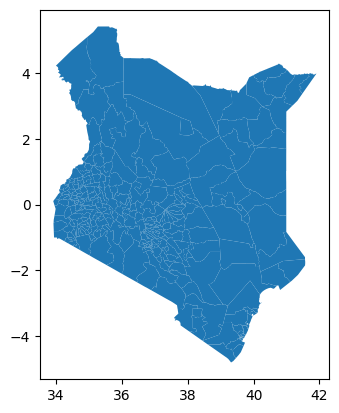

In [50]:
gdf.plot()

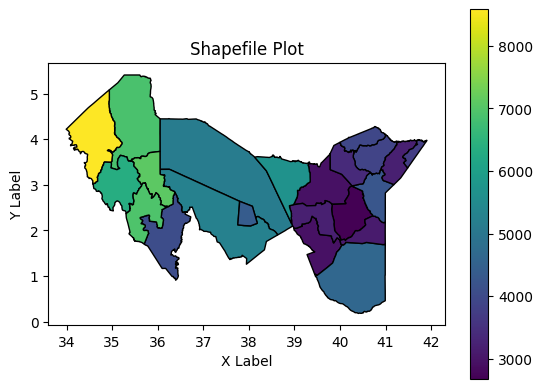

In [53]:
gdf.plot(column='beneficiary_count', legend=True, cmap='viridis', edgecolor='k')
plt.title('Shapefile Plot')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

In [71]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   constituency_code  290 non-null    float64 
 1   population_count   22 non-null     float64 
 2   beneficiary_count  22 non-null     float64 
 3   county             290 non-null    object  
 4   constituency       290 non-null    object  
 5   county_code        290 non-null    float64 
 6   shape_length       290 non-null    float64 
 7   shape_area         290 non-null    float64 
 8   geometry           290 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 20.5+ KB


In [72]:
# save final file as shp
gdf.to_file('Shapefiles/sudy-area/beneficiaries.shp', driver='ESRI Shapefile')

/tmp/ipykernel_29853/4238030067.py:2: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



In [73]:
# save final file as csv
gdf.to_csv('file.csv', index='False')


In [ ]:
# Save the modified data as a new GeoJSON file
gdf.to_file('file.geojson', driver='GeoJSON')